In [1]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('lab2-graph')
df
df2 = df.drop(['t2', 'ch2'], axis=1)
df2

,t1,ch1
0,-750.0,0.743259
1,-749.0,0.782916
2,-748.0,0.797787
3,-747.0,0.817615
4,-746.0,0.842401
...,...,...
1495,745.0,1.124957
1496,746.0,1.124957
1497,747.0,1.129914
1498,748.0,1.124957


### Graph of Time versus Voltage Out (Not graded)

0          0.0
1          1.0
2          2.0
3          3.0
4          4.0
         ...  
1495    1495.0
1496    1496.0
1497    1497.0
1498    1498.0
1499    1499.0
Name: t1, Length: 1500, dtype: float64

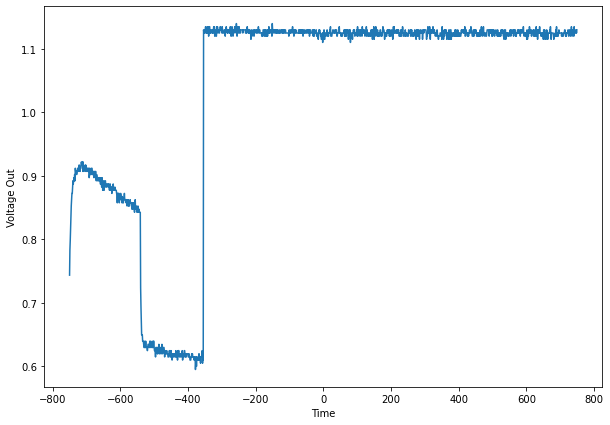

In [2]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlabel('Time')
ax.set_ylabel('Voltage Out')
ax.plot(df2.t1, df2.ch1)
df3 = df2.t1 + 750
df3

In [3]:
# calculate Rt_one
import math

result = 1000 * math.exp(-3528 * (1/298 - 1/373.15))

print(result) # 92.15500621861015. Hand calc gives me 92 Ohms (rounded)

92.15500621861015


In [4]:
vout = 5/(result + 100) * 100
print(vout)

2.6020659562268285


In [5]:
type(df2.ch1)

pandas.core.series.Series

In [6]:
df2.ch1 = pd.to_numeric(df2.ch1)
df2

,t1,ch1
0,-750.0,0.743259
1,-749.0,0.782916
2,-748.0,0.797787
3,-747.0,0.817615
4,-746.0,0.842401
...,...,...
1495,745.0,1.124957
1496,746.0,1.124957
1497,747.0,1.129914
1498,748.0,1.124957


In [7]:
series = pd.to_numeric(df2.t1, errors='coerce')
series

0      -750.0
1      -749.0
2      -748.0
3      -747.0
4      -746.0
        ...  
1495    745.0
1496    746.0
1497    747.0
1498    748.0
1499    749.0
Name: t1, Length: 1500, dtype: float64

In [8]:
type(df2.ch1[0])

numpy.float64

In [9]:
import numpy as np

limited_series = np.clip(series[0:1499], a_min=1e-10, a_max=None)

Rt_one = ((5 * 100)/df2.ch1) - 100

temp = 1/-1*(np.log(Rt_one/1000)/-3528) - (1/298)
temp


new_temp = ((298*np.log(Rt_one/1000)+3528)/3528 * 298)
new_temp

0       283.970330
1       282.426308
2       281.863747
3       281.126727
4       280.225399
           ...    
1495    271.173207
1496    271.173207
1497    271.030313
1498    271.173207
1499    271.030313
Name: ch1, Length: 1500, dtype: float64

In [10]:
df2
df2.t1+745

0         -5.0
1         -4.0
2         -3.0
3         -2.0
4         -1.0
         ...  
1495    1490.0
1496    1491.0
1497    1492.0
1498    1493.0
1499    1494.0
Name: t1, Length: 1500, dtype: float64

### Graph of cooling water (Temperature versus time)

**Caption**: A graph of time versus temperature, where the data shows a temperature drop as time continues. 

**Analysis:** My graph looks sharp because my beginning temperature was not boiling water. My temperature was around 50/60 degrees (40 off 100 C for boiling water) therefore my drop is much faster as time continues. This is because the water temperature is decreasing and around second 390, I poured cold water into my cup, causing the sharp drop. 

The beginning of the graph includes me touching the thermistor and releasing it a few seconds after the measurement started. Once the thermistor was in the water, it quickly climbed to 290 K. My body temperature caused the thermistor to begin at a value, drop, and rise again when it was put into the water.

**Analysis about the thermistor's behavior in temperature:** Thermistors are temperature sensors and they measure changes in temperature by detecting changes in resistance. Resistance in thermistors decreases as temperature increases. It's normal to see rises in Vout as the temperature increases. A thermistor's response time and how quickly it can detect changes in temperature depends on the rate at which heat can flow (which also determines the resistance). In my data specifically, the VOut is higher when temperature is higher becuse resistance is lower and current is flowing through without a lower opposing resistance value. 

As the temperature decreases, the resistance in the thermistor increases and Vout reduces. 

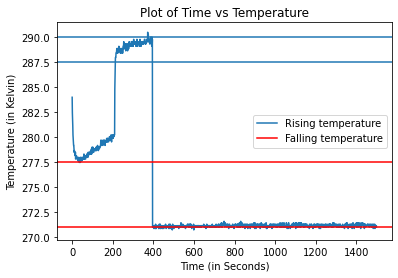

In [32]:
import matplotlib.pyplot as plt
import numpy as np

df3 = df2.t1+750
plt.plot(df3, new_temp)

# lines for rising temperature
plt.axhline(289.99, label='Rising temperature')
plt.axhline(287.5)

# lines for falling temperature
plt.axhline(277.5, color='red', label='Falling temperature')
plt.axhline(271.0, color='red')

plt.legend()

plt.xlabel('Time (in Seconds)')
plt.ylabel('Temperature (in Kelvin)')
plt.title('Plot of Time vs Temperature')
plt.show()